In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(
    rescale=1./255



)

In [4]:
#Read the data from the dataset
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/horses-or-humans-dataset/horse-or-human/train/',
    target_size= (300, 300),
    
    batch_size=32,
    class_mode='binary')

Found 1027 images belonging to 2 classes.


In [11]:
# print(train_generator[1])

In [8]:
# Preprocessing the test set
validation_datagen = ImageDataGenerator(rescale=1./255)

# Reading the test set
validation_generator = validation_datagen.flow_from_directory(
    '/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/',
    target_size= (300, 300),
    batch_size=32,
    class_mode='binary')

Found 256 images belonging to 2 classes.


In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [15]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',
                          input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])



In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 64)       0

In [17]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

In [18]:
history=model.fit(
train_generator,
epochs=15,
validation_data=validation_generator)

Epoch 1/15
33/33 [==============================] - 74s 2s/step - loss: 0.8693 - accuracy: 0.6611 - val_loss: 0.5022 - val_accuracy: 0.7656
Epoch 2/15
33/33 [==============================] - 72s 2s/step - loss: 0.3476 - accuracy: 0.8647 - val_loss: 0.2791 - val_accuracy: 0.9102
Epoch 3/15
33/33 [==============================] - 81s 2s/step - loss: 0.2537 - accuracy: 0.9017 - val_loss: 0.9489 - val_accuracy: 0.8789
Epoch 4/15
33/33 [==============================] - 70s 2s/step - loss: 0.1443 - accuracy: 0.9581 - val_loss: 0.4959 - val_accuracy: 0.8750
Epoch 5/15
33/33 [==============================] - 70s 2s/step - loss: 0.0984 - accuracy: 0.9601 - val_loss: 2.1896 - val_accuracy: 0.8086
Epoch 6/15
33/33 [==============================] - 71s 2s/step - loss: 0.0974 - accuracy: 0.9727 - val_loss: 1.1962 - val_accuracy: 0.8086
Epoch 7/15
33/33 [==============================] - 70s 2s/step - loss: 0.1590 - accuracy: 0.9718 - val_loss: 2.3938 - val_accuracy: 0.8242
Epoch 8/15
33/33 [==

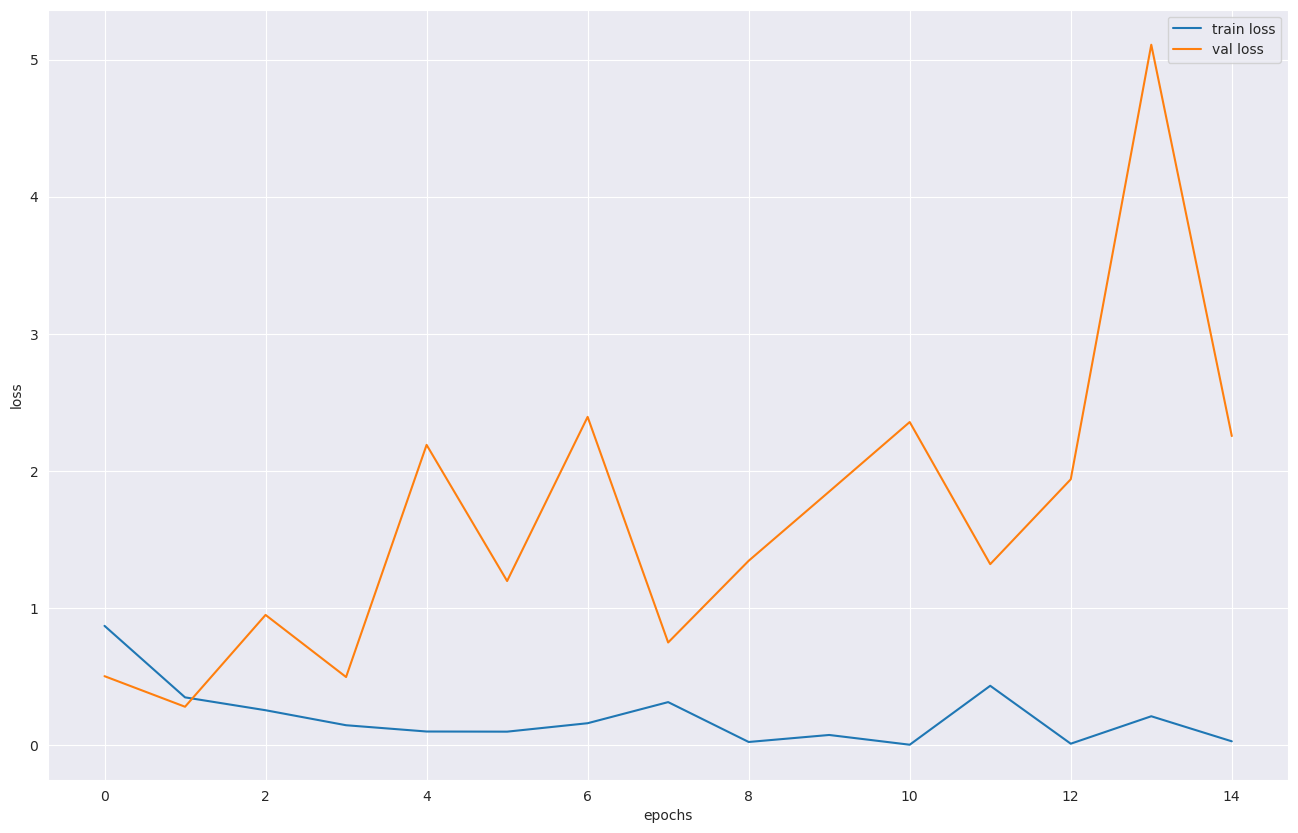

<Figure size 640x480 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(16,10))


plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()
plt.savefig('Loss_val loss')

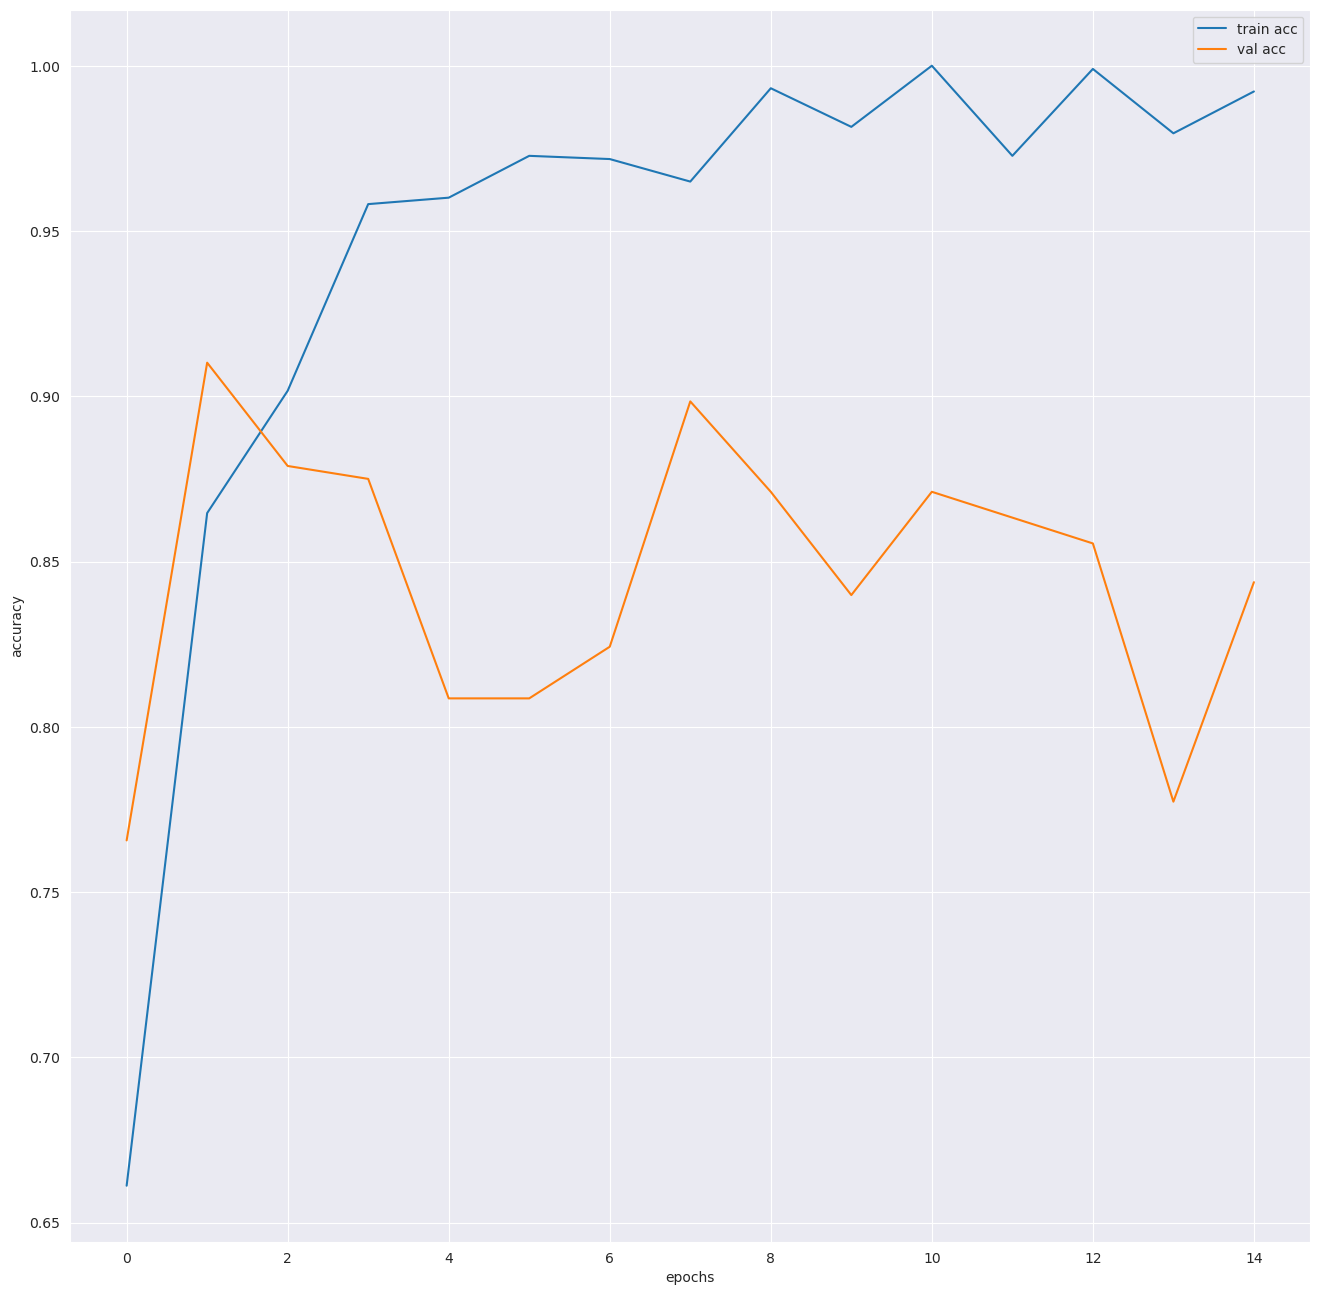

In [23]:
plt.figure(figsize=(16,16))
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.savefig("accval_acc")

In [24]:
history= model.fit(
train_generator,
    epochs=8,
    validation_data=validation_generator)

Epoch 1/8
33/33 [==============================] - 68s 2s/step - loss: 3.9932e-04 - accuracy: 1.0000 - val_loss: 2.9809 - val_accuracy: 0.8320
Epoch 2/8
33/33 [==============================] - 68s 2s/step - loss: 0.0547 - accuracy: 0.9864 - val_loss: 1.8041 - val_accuracy: 0.8672
Epoch 3/8
33/33 [==============================] - 68s 2s/step - loss: 5.7825e-04 - accuracy: 1.0000 - val_loss: 2.3673 - val_accuracy: 0.8633
Epoch 4/8
33/33 [==============================] - 69s 2s/step - loss: 1.5682e-04 - accuracy: 1.0000 - val_loss: 2.7074 - val_accuracy: 0.8555
Epoch 5/8
33/33 [==============================] - 68s 2s/step - loss: 3.5643e-05 - accuracy: 1.0000 - val_loss: 2.7972 - val_accuracy: 0.8594
Epoch 6/8
33/33 [==============================] - 68s 2s/step - loss: 0.3640 - accuracy: 0.9796 - val_loss: 3.1484 - val_accuracy: 0.8398
Epoch 7/8
33/33 [==============================] - 68s 2s/step - loss: 6.4669e-04 - accuracy: 1.0000 - val_loss: 2.6064 - val_accuracy: 0.8750
Epoch 8

In [25]:
model.save_weights('f_model.h5')
model.load_weights('f_model.h5')

In [26]:
# Creating path of test image:
path = '../input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman01-01.png'

In [27]:
from tensorflow.keras.preprocessing import image
import numpy as np

img=image.load_img(path,target_size=(300,300))

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

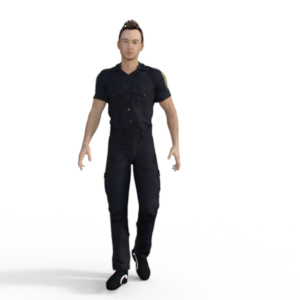

In [28]:
img

In [31]:
classes=model.predict(x)
if classes[0]>0.5:
    print("Image is a human")
else:
    print("its a horse")

1/1 [==============================] - 0s 182ms/step
Image is a human


In [32]:
path = '../input/horses-or-humans-dataset/horse-or-human/validation/horses/horse1-105.png'

img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

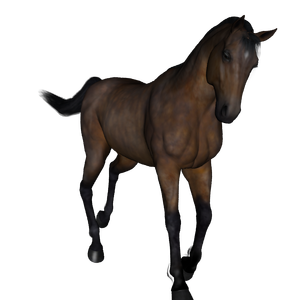

In [33]:
img

In [34]:
classes=model.predict(x)
if classes[0]>0.5:
    print("Image is a human")
else:
    print("its a horse")

1/1 [==============================] - 0s 46ms/step
its a horse
